RDataFrame advanced features

Working with numpy arrays

In [32]:
import numpy
import ROOT

np_dict = {colname: numpy.random.rand(100) for colname in ["a", "b", "c"]}

df = ROOT.RDF.FromNumpy(np_dict)

print(f"Columns in the RDataFrame: {df.GetColumnNames()}")

Columns in the RDataFrame: { "a", "b", "c" }


Number of rows in the dataset: 100
Average value of column a: 0.46521363657258147


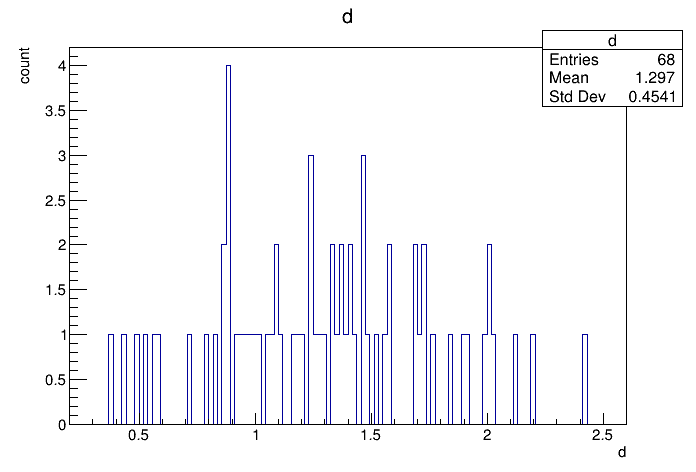

In [33]:
co = df.Count()
m_a = df.Mean("a")

fill = df.Filter("c < 0.7")
defl = fill.Define("d", "a+b+c")
h = defl.Histo1D("d")

c = ROOT.TCanvas()
h.Draw()

print(f"Number of rows in the dataset: {co.GetValue()}")
print(f"Average value of column a: {m_a.GetValue()}")
c.Draw()

In [39]:
np_dict_mod = defl.AsNumpy()

np_dict_mod

{'a': ndarray([0.2318224 , 0.17865916, 0.1284772 , 0.18604521, 0.36696848,
          0.61727333, 0.13407695, 0.68347871, 0.25177403, 0.32045564,
          0.13947598, 0.70003011, 0.40057442, 0.51553279, 0.24838823,
          0.77460652, 0.29628617, 0.115509  , 0.58073782, 0.26824579,
          0.20808062, 0.60990422, 0.04405671, 0.88812799, 0.83788888,
          0.90415949, 0.53240558, 0.05164318, 0.91858052, 0.83474681,
          0.90754691, 0.67472895, 0.59183068, 0.13040364, 0.72163577,
          0.6077036 , 0.69655193, 0.0571587 , 0.50730554, 0.11024231,
          0.07753411, 0.31785269, 0.29369842, 0.56056434, 0.10232246,
          0.07744585, 0.94948154, 0.88963347, 0.19940085, 0.71941693,
          0.49812613, 0.5435243 , 0.90178954, 0.57111776, 0.21862497,
          0.19917912, 0.45039046, 0.33756403, 0.96614656, 0.19368622,
          0.76824312, 0.21990216, 0.30572209, 0.75953658, 0.0295511 ,
          0.5023121 , 0.0931876 , 0.58868237]),
 'b': ndarray([0.56321695, 0.43952945

Multiple concurrent RDataFrame runs

In [34]:
ROOT.EnableImplicitMT()
treename1 = "myDataset"
filename1 = "data/collections_dataset.root"
treename2 = "dataset"
filename2 = "data/example_file.root"

df1 = ROOT.RDataFrame(treename1, filename1)
df2 = ROOT.RDataFrame(treename2, filename2)
h1 = df1.Histo1D("px")
h2 = df2.Histo1D("a")

ROOT.RDF.RunGraphs((h1, h2))
ROOT.DisableImplicitMT()

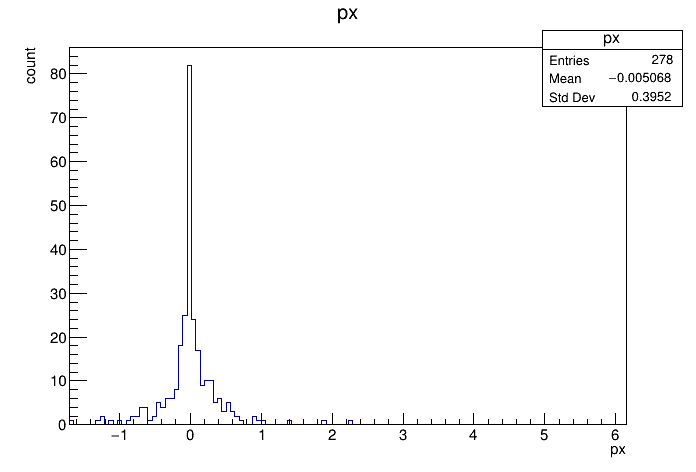

In [35]:
c = ROOT.TCanvas()
h1.Draw()
c.Draw()

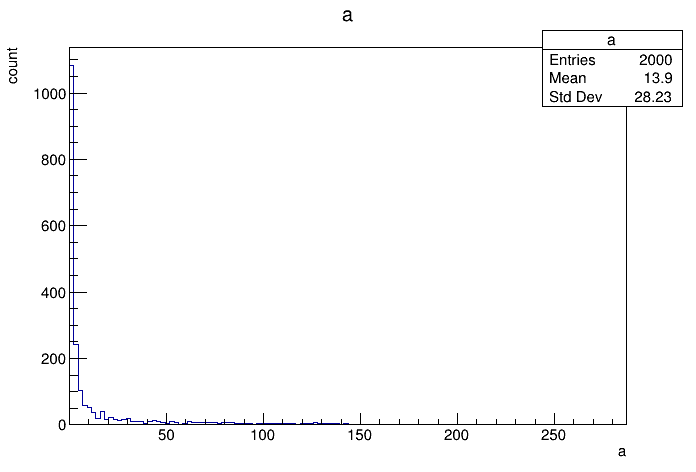

In [36]:
c = ROOT.TCanvas()
h2.Draw()
c.Draw()

Re-defining values of a column

In [37]:
df = ROOT.RDataFrame(5).Define("x", "42")
df.Display().Print()

+-----+----+
| Row | x  | 
+-----+----+
| 0   | 42 | 
+-----+----+
| 1   | 42 | 
+-----+----+
| 2   | 42 | 
+-----+----+
| 3   | 42 | 
+-----+----+
| 4   | 42 | 
+-----+----+


In [38]:
df = df.Redefine("x", "x * 10")
df.Display().Print()

+-----+-----+
| Row | x   | 
+-----+-----+
| 0   | 420 | 
+-----+-----+
| 1   | 420 | 
+-----+-----+
| 2   | 420 | 
+-----+-----+
| 3   | 420 | 
+-----+-----+
| 4   | 420 | 
+-----+-----+


Distributed RDataFrame